In [1]:
from glotaran_tools.specification_parser import parse_yml
from glotaran_core.model import Dataset
from glotaran_models.kinetic import KineticSeparableModel
import numpy as np
from lmfit import Parameters
# Imports for plotting

import matplotlib.pyplot as plt
%matplotlib notebook
fitspec = '''
type: kinetic

parameter: {}

compartments: [s1, s2, s3]

initial_concentrations:
    - label: i1
      parameter: [4,5,6]

megacomplexes:
    - label: mc1
      k_matrices: [k1]

k_matrices:
  - label: "k1"
    matrix: {{
      '("s1","s1")': 1,
      '("s2","s2")': 2,
      '("s3","s3")': 3,
}}

irf: []

datasets: 
  - label: dataset1
    type: spectral
    initial_concentration: i1
    megacomplexes: [mc1]
    path: 'data/dataset1.ascii'

'''

In [2]:
test_parameter = [301e-4, 502e-5, 705e-6, 20, 200, 1000]
test_amps = [1,2,3]
times = np.asarray(np.arange(0, 1500, 1.5))
simparams = Parameters()
simparams.add("p1", 101e-3)
simparams.add("p2",202e-4)
simparams.add("p3",505e-5)
simparams.add("p4",1)
simparams.add("p5",1)
simparams.add("p6",1)
simparams.pretty_print()

Name     Value      Min      Max   Stderr     Vary     Expr
p1     0.101     -inf      inf     None     True     None
p2    0.0202     -inf      inf     None     True     None
p3   0.00505     -inf      inf     None     True     None
p4         1     -inf      inf     None     True     None
p5         1     -inf      inf     None     True     None
p6         1     -inf      inf     None     True     None


In [3]:
model = parse_yml(fitspec.format(test_parameter))

In [4]:
fitmodel = KineticSeparableModel(model)
fitmodel.get_initial_fitting_parameter().pretty_print()

Name     Value      Min      Max   Stderr     Vary     Expr
p1    0.0301     -inf      inf     None     True     None
p2   0.00502     -inf      inf     None     True     None
p3  0.000705     -inf      inf     None     True     None
p4        20     -inf      inf     None     True     None
p5       200     -inf      inf     None     True     None
p6      1000     -inf      inf     None     True     None


[50, 500, 5000]
[500, 5000, 50]
(1, 3)
[[  500.  5000.    50.]]
[1, 1, 1]
[1, 1, 1]
(1, 3)
[[ 1.  1.  1.]]
[[ 1.  1.  1.]]


<IPython.core.display.Javascript object>


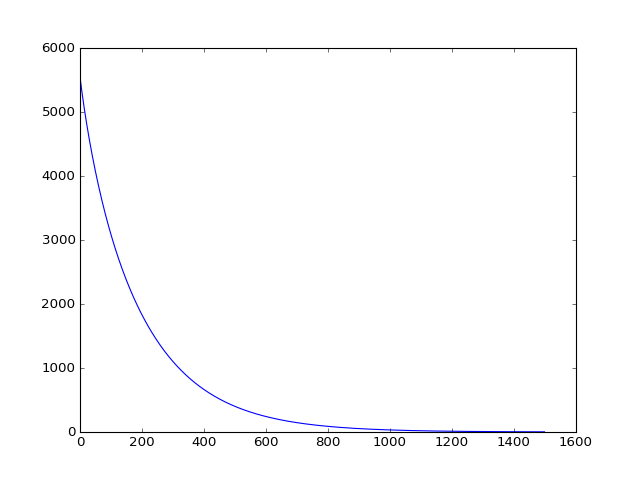

In [5]:
data = fitmodel.eval(simparams, *times, **{'dataset':'dataset1','amplitudes':[50, 500, 5000]})
print(fitmodel.e_matrix(**{'dataset':'dataset1','amplitudes':[1, 1, 1]}))
fig = plt.figure()
plt.plot(times, data[:, 0])

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.8984e+04                                    4.26e+08    
       1              2         8.2401e+02      2.82e+04       1.02e+03       1.79e+07    
       2              3         5.2649e+02      2.98e+02       2.04e+03       3.05e+06    
       3             15         5.0430e+02      2.22e+01       9.73e-04       1.85e+06    
       4             17         4.9281e+02      1.15e+01       4.86e-04       1.22e+06    
       5             19         4.8550e+02      7.31e+00       2.43e-04       4.87e+05    
       6             20         4.7764e+02      7.86e+00       4.86e-04       9.60e+05    
       7             21         4.7458e+02      3.07e+00       4.86e-04       1.02e+06    
       8             22         4.5984e+02      1.47e+01       1.22e-04       2.31e+05    
       9             23         4.5908e+02      7.59e-01       2.43e-04       4.14e+05    

<IPython.core.display.Javascript object>


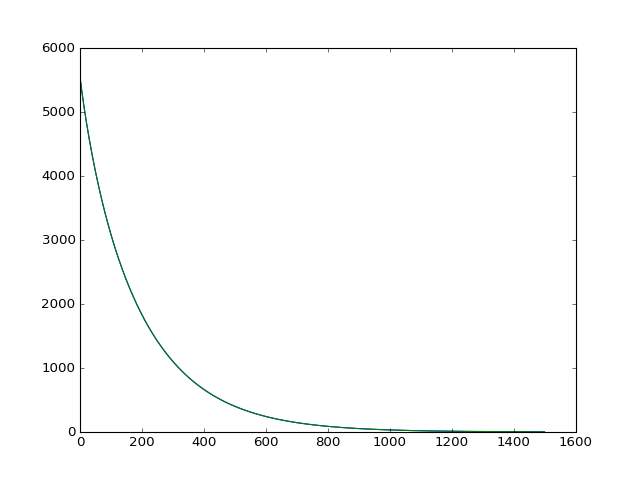

In [8]:
result = fitmodel.fit(fitmodel.get_initial_fitting_parameter(), 
                      *times, 
                      **{"data": data}
                     )
result.best_fit_parameter.pretty_print()
print('Fitted Amplitudes: {}'.format(result.e_matrix(*times, **{"data": data})))
reconstructed_data = result.eval(*times, **{"data": data})
fig = plt.figure()
plt.plot(times, data[:, 0])
plt.plot(times, reconstructed_data[:, 0])